In [1]:
## conda env Weather_Prediction

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
## load the data

full_df = pd.read_pickle("2010_data.pkl")
full_df=full_df.drop(columns=['location_name', 'fips', 'year', 'NAME', 'geometry'],axis=1)
pd.set_option('display.max_columns', None)
full_df

,MeanLifeExpectency,d2m,t2m,bcaod550,chnk,duaod550,lai_hv,lai_lv,msl,omaod550,pm2p5,pm10,ssaod550,asn,rsn,sd,suaod550,sp,tsn,aod550,tcco,tc_c2h6,tchcho,tc_oh,tc_c5h8,tc_ch4,tc_hno3,tcno2,tc_no,gtco3,tc_pan,tc_c3h8,tcso2,tcw,tcwv,aermssdus,aermssdum,aermssdul,aermssbchphil,aermssomhphil,aermssbchphob,aermssomhphob,aermsssss,aermssssm,aermssssl,aermsssu,aermssso2
0,75.728489,283.454410,291.089093,0.006284,0.01800,0.010721,3.928873,2.633910,101693.509736,0.075966,1.445389e-08,1.981001e-08,0.007574,0.878745,271.096109,0.005542,0.071412,100187.304165,272.665101,0.171956,0.000890,0.000003,4.351195e-06,4.876012e-09,3.973694e-06,0.009891,0.000005,0.000003,4.658415e-07,0.006583,0.000009,6.953380e-07,2.916594e-06,25.766945,25.620820,2.109251e-06,4.289945e-06,3.297524e-06,1.285140e-07,0.000003,5.390907e-07,0.000013,2.305156e-07,0.000016,1.011381e-06,0.000008,1.620365e-06
1,77.826608,286.767193,292.241782,0.006410,0.01527,0.013597,3.930011,2.508253,101685.471788,0.072641,1.346257e-08,1.847324e-08,0.010417,0.879538,193.698250,0.004818,0.069880,101309.280631,275.408300,0.172946,0.000875,0.000003,3.513297e-06,4.926652e-09,2.062545e-06,0.010006,0.000005,0.000003,4.380713e-07,0.006433,0.000008,6.623504e-07,2.408668e-06,27.838995,27.701486,2.641386e-06,5.453165e-06,4.363785e-06,1.200844e-07,0.000002,5.609629e-07,0.000013,2.891494e-07,0.000021,2.088636e-06,0.000008,1.140217e-06
2,75.841973,284.124711,291.030084,0.006434,0.01800,0.010576,4.154440,2.339233,101690.626048,0.073790,1.528844e-08,2.094088e-08,0.007874,0.879026,245.431868,0.006236,0.067283,100229.513473,272.708199,0.165957,0.000885,0.000003,4.161191e-06,4.878442e-09,3.484876e-06,0.009897,0.000005,0.000003,4.412445e-07,0.006521,0.000009,6.841318e-07,2.561723e-06,26.076443,25.936913,2.072566e-06,4.220296e-06,3.329836e-06,1.460098e-07,0.000002,5.375428e-07,0.000013,2.383421e-07,0.000016,1.124706e-06,0.000008,1.212712e-06
3,73.705432,283.448675,290.734945,0.006233,0.01800,0.010422,3.859579,2.695780,101696.274163,0.077023,1.467121e-08,2.014099e-08,0.007201,0.878604,274.363643,0.005314,0.073008,100215.778699,272.652578,0.173887,0.000894,0.000003,4.369584e-06,4.879895e-09,3.844808e-06,0.009893,0.000005,0.000004,5.053737e-07,0.006622,0.000009,7.044878e-07,3.263775e-06,25.607194,25.458810,2.049331e-06,4.173433e-06,3.204589e-06,1.257123e-07,0.000003,5.365352e-07,0.000013,2.220161e-07,0.000015,9.132320e-07,0.000008,1.971961e-06
4,75.753407,282.868247,289.766565,0.006107,0.01800,0.008332,3.234586,2.781183,101710.006570,0.077158,1.519334e-08,2.097774e-08,0.006178,0.877193,276.665988,0.006156,0.074710,99027.783845,272.614234,0.172485,0.000889,0.000003,4.043741e-06,4.893173e-09,2.631260e-06,0.009770,0.000005,0.000004,5.254242e-07,0.006689,0.000009,7.188703e-07,3.696579e-06,24.042930,23.889293,1.644247e-06,3.319324e-06,2.564080e-06,1.292652e-07,0.000003,5.195765e-07,0.000013,1.988160e-07,0.000013,7.093172e-07,0.000008,2.447597e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,77.582422,268.842111,278.301219,0.004760,0.01800,0.004101,2.370862,0.499930,101630.449624,0.043633,7.253336e-09,1.103061e-08,0.005092,0.798388,288.873684,0.016426,0.023886,78530.596578,268.911264,0.081471,0.000644,0.000003,1.057299e-06,4.941603e-09,8.047194e-08,0.007655,0.000003,0.000002,4.937694e-07,0.006915,0.000005,5.093373e-07,1.734801e-06,7.928388,7.855770,5.407217e-07,1.250976e-06,3.762784e-06,9.304454e-08,0.000002,4.126463e-07,0.000008,2.043045e-07,0.000013,9.202822e-07,0.000003,1.312529e-06
3123,83.771012,267.887551,274.410086,0.004909,0.01800,0.001664,2.481296,2.428177,101634.772736,0.046080,6.861324e-09,9.790676e-09,0.006100,0.807739,305.402204,0.095034,0.021758,75497.845779,268.751272,0.080511,0.000615,0.000003,8.352510e-07,4.851321e-09,7.964809e-08,0.007339,0.000003,0.000001,2.701267e-07,0.007030,0.000004,4.969263e-07,5.508047e-07,6.659885,6.563536,2.826886e-07,6.105456e

In [3]:
full_df.info() ## check if there are any null values

<class 'pandas.core.frame.DataFrame'>
Index: 3078 entries, 0 to 3126
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MeanLifeExpectency  3078 non-null   float64
 1   d2m                 3078 non-null   float64
 2   t2m                 3078 non-null   float64
 3   bcaod550            3078 non-null   float64
 4   chnk                3078 non-null   float64
 5   duaod550            3078 non-null   float64
 6   lai_hv              3078 non-null   float64
 7   lai_lv              3078 non-null   float64
 8   msl                 3078 non-null   float64
 9   omaod550            3078 non-null   float64
 10  pm2p5               3078 non-null   float64
 11  pm10                3078 non-null   float64
 12  ssaod550            3078 non-null   float64
 13  asn                 3078 non-null   float64
 14  rsn                 3078 non-null   float64
 15  sd                  3078 non-null   float64
 16  suaod550   

In [4]:
full_df.describe()

,MeanLifeExpectency,d2m,t2m,bcaod550,chnk,duaod550,lai_hv,lai_lv,msl,omaod550,pm2p5,pm10,ssaod550,asn,rsn,sd,suaod550,sp,tsn,aod550,tcco,tc_c2h6,tchcho,tc_oh,tc_c5h8,tc_ch4,tc_hno3,tcno2,tc_no,gtco3,tc_pan,tc_c3h8,tcso2,tcw,tcwv,aermssdus,aermssdum,aermssdul,aermssbchphil,aermssomhphil,aermssbchphob,aermssomhphob,aermsssss,aermssssm,aermssssl,aermsssu,aermssso2
count,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3.078000e+03,3.078000e+03,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3.078000e+03,3.078000e+03,3.078000e+03,3.078000e+03,3078.000000,3.078000e+03,3078.000000,3.078000e+03,3078.000000,3078.000000,3.078000e+03,3.078000e+03,3078.000000,3078.000000,3.078000e+03,3.078000e+03,3.078000e+03,3.078000e+03,3.078000e+03,3.078000e+03,3078.000000,3.078000e+03,3078.000000,3.078000e+03,3078.000000,3.078000e+03
mean,77.555393,279.286740,286.322819,0.006194,0.017666,0.006158,2.573061,1.782905,101581.266338,0.073482,1.277769e-08,1.792885e-08,0.006398,0.858064,266.819290,0.028625,0.053386,96583.198461,272.224828,0.145618,0.000869,3.362872e-06,2.659128e-06,4.948213e-09,1.158572e-06,0.009513,5.158954e-06,0.000004,5.233296e-07,0.006899,0.000008,7.340165e-07,2.390900e-06,19.697165,19.553388,1.106267e-06,2.296085e-06,2.913133e-06,1.410362e-07,2.983671e-06,5.170859e-07,0.000012,2.137574e-07,0.000014,1.251198e-06,0.000006,1.542041e-06
std,2.356462,4.246436,4.259550,0.000881,0.000913,0.003662,1.159839,0.792264,99.828156,0.014171,3.126344e-09,4.282502e-09,0.004102,0.020141,36.739171,0.030665,0.017609,5314.340519,1.945881,0.030615,0.000070,2.324833e-07,9.268329e-07,9.922277e-11,1.091921e-06,0.000546,9.881726e-07,0.000001,1.545441e-07,0.000296,0.000001,9.639952e-08,1.020294e-06,5.193966,5.185896,7.117862e-07,1.466597e-06,1.757448e-06,3.382005e-08,7.124508e-07,6.724024e-08,0.000002,7.892924e-08,0.000007,1.952386e-06,0.000002,8.543425e-07
min,66.689077,266.760395,274.327385,0.002814,0.010909,0.001001,0.000000,0.000000,101086.899528,0.026523,5.638565e-09,8.107678e-09,0.002529,0.787406,99.999992,0.000000,0.016826,70480.888529,267.779697,0.055840,0.000550,2.236918e-06,8.352510e-07,4.450208e-09,1.899933e-08,0.006843,2.425352e-06,0.000001,2.567314e-07,0.005997,0.000004,4.160076e-07,5.018396e-07,6.090429,6.020432,1.831823e-07,3.964977e-07,4.028663e-07,5.562463e-08,1.117594e-06,2.433519e-07,0.000005,1.365104e-07,0.000007,3.598629e-07,0.000002,2.363047e-07
25%,75.929472,276.720872,283.164976,0.005864,0.017979,0.003373,1.883848,1.180005,101538.329496,0.066052,1.042362e-08,1.471902e-08,0.004273,0.845104,274.260192,0.008554,0.036700,96033.279578,271.423177,0.122706,0.000855,3.318419e-06,1.884001e-06,4.899179e-09,2.180920e-07,0.009453,4.623275e-06,0.000003,4.377507e-07,0.006696,0.000007,6.834107e-07,1.551236e-06,16.507101,16.345731,5.568806e-07,1.183389e-06,1.683175e-06,1.227414e-07,2.517433e-06,4.934364e-07,0.000011,1.702167e-07,0.000010,4.756858e-07,0.000004,8.705527e-07
50%,77.678138,279.303623,286.446575,0.006270,0.018000,0.005318,2.662294,1.796283,101599.889047,0.077047,1.350908e-08,1.884730e-08,0.004840,0.863657,278.128581,0.019291,0.058593,98218.784548,272.078343,0.153735,0.000890,3.410000e-06,2.665413e-06,4.946593e-09,7.110256e-07,0.009680,5.317053e-06,0.000004,5.029050e-07,0.006915,0.000008,7.353341e-07,2.299754e-06,19.709306,19.544691,9.133953e-07,1.890944e-06,2.545522e-06,1.369290e-07,2.977997e-06,5.266984e-07,0.000012,1.858302e-07,0.000011,6.360499e-07,0.000006,1.357067e-06
75%,79.149448,282.102890,289.648420,0.006715,0.018000,0.007911,3.358631,2.548943,101654.163409,0.083099,1.499439e-08,2.086808e-08,0.007205,0.876106,281.693064,0.039002,0.068899,99794.438539,272.707335,0.170116,0.000913,3.506349e-06,3.456460e-06,4.996222e-09,2.065373e-06,0.009845,5.815881e-06,0.000004,5.806062e-07,0.007119,0.000009,7.920873e-07,3.029549e-06,23.312181,23.178155,1.456397e-06,2.988685e-06,3.920587e-06,1.595545e-07,3.562753e-06,5.581

In [5]:
## Lets create a Train-Test set

features=full_df.drop('MeanLifeExpectency',axis=1)
target=full_df['MeanLifeExpectency'].copy()

#from sklearn.model_selection import train_test_split
## the random state will not be included so that the data will be shuffled

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.10) #random_state=42)


#### After the cell below, the X_train and y_train, which is 90% of the original data is divided into 89% train and 11% validation. Thus the validation set is 0.90 X 0.11=0.099 (~ 10%) of the original data. The test set above is untouched, so remains 10% and the training set is 0.89 X 0.90 =80.01 ( ~ 80%) of the total data. 
#### We thus get 80% train, 10% validation and 10% test set.

In [6]:
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.11)

#### Note that the linear regression model, does not have any hyperparameter to optimize. So, lets revert back to the original train, test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20) 

In [8]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train) ## fit transform the train set

In [9]:
X_test_scaled=scaler.transform(X_test) ## note that, only transform, not fit_transform the test set

In [10]:
## fit the model and find the error in the traning set

lin_reg=LinearRegression()
lin_reg.fit(X_train_scaled,y_train)

train_prediction=lin_reg.predict(X_train_scaled)

mse_train=mean_squared_error(y_train, train_prediction)
rmse_train=np.sqrt(mse_train)
rmse_train=int(rmse_train*100)/100 ## display only two digits without rounding

print('The train RMSE using linear regression :::', '%.2f' % rmse_train)

The train RMSE using linear regression ::: 1.62


In [11]:
## The test prediction

test_prediction=lin_reg.predict(X_test_scaled)

mse_test=mean_squared_error(y_test,test_prediction)
rmse_test=np.sqrt(mse_test)
rmse_test=int(rmse_test*100)/100 

print('The test RMSE using linear regression :::', '%.2f' % rmse_test)

The test RMSE using linear regression ::: 1.66


In [12]:
## the train r square

train_r_sq=(pearsonr(y_train,train_prediction)[0])**2
corr_train=int(train_r_sq*100)/100 ## display only two digits without rounding

print('The train r_sq using linear regression :::', '%.2f' % corr_train)

The train r_sq using linear regression ::: 0.51


In [13]:
## The test r square

test_r_sq=(pearsonr(y_test,test_prediction)[0])**2
corr_test=int(test_r_sq*100)/100 ## display only two digits without rounding

print('The test r_sq using linear regression :::', '%.2f' % corr_test)

The test r_sq using linear regression ::: 0.54


In [14]:
## steps to convert train and test to pandas dataframe. This step is necessary to plot in seaborn

y_train_np=y_train.to_numpy() ## convert dtype to numpy to plot from seaborn
y_test_np=y_test.to_numpy() 

df1=pd.DataFrame(y_train_np, columns=['Actual'])
df2=pd.DataFrame(train_prediction, columns=['Estimated'])
df3=pd.concat([df1, df2],axis=1)  ## concatenate the columns
df3['Label']='Train'

df4=pd.DataFrame(y_test_np, columns=['Actual'])
df5=pd.DataFrame(test_prediction, columns=['Estimated'])
df6=pd.concat([df4, df5],axis=1)
df6['Label']='Test'

sns_df=pd.concat([df3,df6])
sns_df

,Actual,Estimated,Label
0,74.430332,75.532306,Train
1,80.260417,78.903914,Train
2,75.170818,75.445905,Train
3,75.079644,77.331344,Train
4,78.711820,79.602480,Train
...,...,...,...
611,74.503035,76.027941,Test
612,74.191853,73.854075,Test
613,75.764429,76.633353,Test
614,76.445792,77.220251,Test


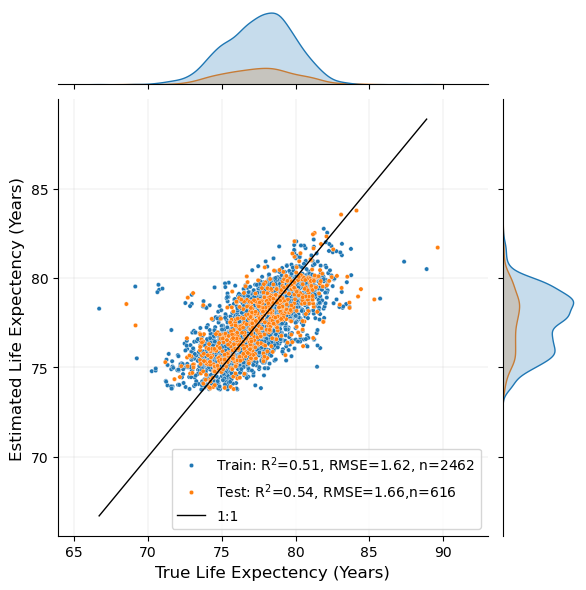

In [15]:
## scatter plot in seaborn

g=sns.jointplot(data=sns_df, x='Actual', y='Estimated', kind="scatter", hue='Label',s=10)
plt.grid(axis='both',linewidth=0.15)

p1 = max(max(train_prediction), max(y_train))
p2 = min(min(train_prediction), min(y_train))

g.ax_joint.plot([p1, p2], [p1, p2], color='k',linewidth=1, label='1:1')

# Customize the legend
handles, labels = g.ax_joint.get_legend_handles_labels()  


g.ax_joint.legend(handles=handles,  labels=[ f'Train: R$^2$={corr_train}, RMSE={rmse_train}, n={len(X_train)}', 
                                             f'Test: R$^2$={corr_test}, RMSE={rmse_test},n={len(X_test)}','1:1'],
                                                                                                        title=None)

g.set_axis_labels(r'True Life Expectency (Years)', r'Estimated Life Expectency (Years)',fontsize=12)

plt.show()

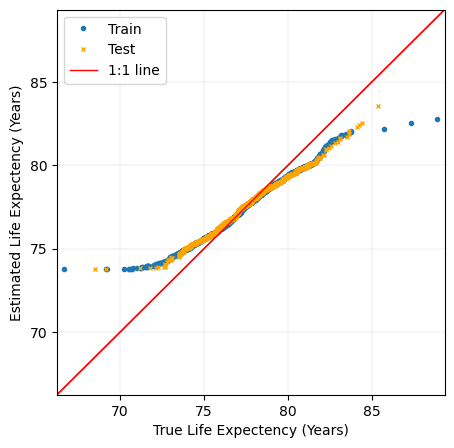

In [16]:
## Lets plot the quantile-quantile plot

fig, ax = plt.subplots(figsize=(5,5))

pp_x = sm.ProbPlot(y_train, fit=False)
pp_y = sm.ProbPlot(train_prediction, fit=False)


qq = pp_y.qqplot(marker='o',markersize=3,other=pp_x,ax=ax, label='Train') ## qq plot for train data
sm.qqline(ax=ax, line='45', fmt='r',linewidth=1)

pp_xx = sm.ProbPlot(y_test, fit=False)
pp_yy = sm.ProbPlot(test_prediction, fit=False)

## overlay qq plot for test data
qqq = pp_yy.qqplot(xlabel='True Life Expectency (Years)',ylabel='Estimated Life Expectency (Years)',
                            marker='x',markersize=3,other=pp_xx,ax=ax,markeredgecolor = 'orange',
                                      markerfacecolor = 'orange', label='Test')

sm.qqline(qq.axes[0], line='45', fmt='r',linewidth=1, label='1:1 line')
plt.grid(axis='both',linewidth=0.15)
plt.legend()
plt.show()

In [17]:
## calculation of feature importance

In [18]:
importance = lin_reg.coef_
importance

array([-2.00048708e+00, -3.22728760e+00, -4.91086538e+02, -1.10448442e-01,
       -1.74890120e+03,  5.96975746e-03,  3.35524975e-01, -6.90025427e-01,
       -7.34339042e+03,  1.35263413e+00, -9.46327647e-01, -2.11112902e+03,
        3.88109929e-01,  1.71899040e-01, -2.19423219e-01, -9.04156769e+03,
       -5.16378202e+01,  4.39041194e-01,  1.57897115e+04, -2.26828883e+00,
       -2.40662951e+00,  4.79212484e-01,  3.68933176e-01, -6.47277844e-02,
        5.80237160e+01, -4.32945003e-01,  3.45519702e-01, -1.83318534e-01,
       -3.61211459e+00, -1.50326480e+00,  2.33004763e+00, -2.78086097e+00,
        2.39313846e+01, -2.39563298e+01, -5.21586385e+01, -4.69143495e+01,
       -2.20194816e+01,  1.22520254e+01, -7.97082137e-01,  2.29256044e+01,
       -8.68840505e-01,  2.77470173e+01, -2.55170750e+01, -2.24346013e+00,
        3.75356767e+00,  2.14423836e+00])

In [19]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -2.00049
Feature: 1, Score: -3.22729
Feature: 2, Score: -491.08654
Feature: 3, Score: -0.11045
Feature: 4, Score: -1748.90120
Feature: 5, Score: 0.00597
Feature: 6, Score: 0.33552
Feature: 7, Score: -0.69003
Feature: 8, Score: -7343.39042
Feature: 9, Score: 1.35263
Feature: 10, Score: -0.94633
Feature: 11, Score: -2111.12902
Feature: 12, Score: 0.38811
Feature: 13, Score: 0.17190
Feature: 14, Score: -0.21942
Feature: 15, Score: -9041.56769
Feature: 16, Score: -51.63782
Feature: 17, Score: 0.43904
Feature: 18, Score: 15789.71152
Feature: 19, Score: -2.26829
Feature: 20, Score: -2.40663
Feature: 21, Score: 0.47921
Feature: 22, Score: 0.36893
Feature: 23, Score: -0.06473
Feature: 24, Score: 58.02372
Feature: 25, Score: -0.43295
Feature: 26, Score: 0.34552
Feature: 27, Score: -0.18332
Feature: 28, Score: -3.61211
Feature: 29, Score: -1.50326
Feature: 30, Score: 2.33005
Feature: 31, Score: -2.78086
Feature: 32, Score: 23.93138
Feature: 33, Score: -23.95633
Feature: 34, Sc

In [20]:
column_names = features.columns
column_names

Index(['d2m', 't2m', 'bcaod550', 'chnk', 'duaod550', 'lai_hv', 'lai_lv', 'msl',
       'omaod550', 'pm2p5', 'pm10', 'ssaod550', 'asn', 'rsn', 'sd', 'suaod550',
       'sp', 'tsn', 'aod550', 'tcco', 'tc_c2h6', 'tchcho', 'tc_oh', 'tc_c5h8',
       'tc_ch4', 'tc_hno3', 'tcno2', 'tc_no', 'gtco3', 'tc_pan', 'tc_c3h8',
       'tcso2', 'tcw', 'tcwv', 'aermssdus', 'aermssdum', 'aermssdul',
       'aermssbchphil', 'aermssomhphil', 'aermssbchphob', 'aermssomhphob',
       'aermsssss', 'aermssssm', 'aermssssl', 'aermsssu', 'aermssso2'],
      dtype='object')

In [21]:
feature_list=sorted(zip(importance, column_names), reverse=True)
feature_list

[(15789.711520882114, 'aod550'),
 (58.023716003201386, 'tc_ch4'),
 (27.74701728535773, 'aermsssss'),
 (23.931384610065294, 'tcw'),
 (22.925604417985674, 'aermssbchphob'),
 (12.252025435345383, 'aermssbchphil'),
 (3.7535676684268506, 'aermsssu'),
 (2.330047625579706, 'tc_c3h8'),
 (2.144238362316249, 'aermssso2'),
 (1.352634131969278, 'pm2p5'),
 (0.47921248436308717, 'tchcho'),
 (0.4390411941955386, 'tsn'),
 (0.3881099293476002, 'asn'),
 (0.368933176201376, 'tc_oh'),
 (0.3455197016535084, 'tcno2'),
 (0.3355249752811256, 'lai_lv'),
 (0.17189903950877508, 'rsn'),
 (0.005969757460364927, 'lai_hv'),
 (-0.06472778438684582, 'tc_c5h8'),
 (-0.11044844198503813, 'chnk'),
 (-0.1833185342034283, 'tc_no'),
 (-0.21942321890444744, 'sd'),
 (-0.43294500292151933, 'tc_hno3'),
 (-0.6900254269918874, 'msl'),
 (-0.7970821373808504, 'aermssomhphil'),
 (-0.868840504791903, 'aermssomhphob'),
 (-0.9463276474955148, 'pm10'),
 (-1.5032648020171862, 'tc_pan'),
 (-2.000487083720912, 'd2m'),
 (-2.243460134489943, 

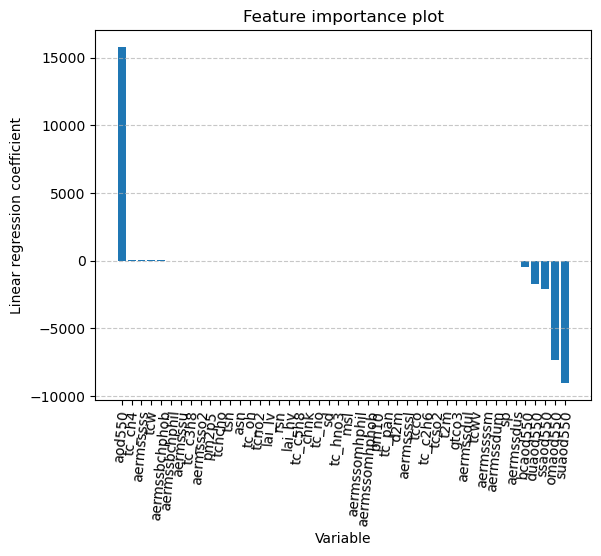

In [22]:
values, labels = zip(*feature_list)## upzip the list for plotting 

plt.bar(labels, values)
plt.xlabel('Variable')
plt.ylabel('Linear regression coefficient')
plt.title('Feature importance plot')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add vertical gridlines
plt.xticks(rotation=85)  # Rotate labels to vertical
plt.show()

### Note that the model is highly underfitting as it is doing poor in both the training and the testing set.